In [1]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
from utils.err import *

In [2]:
import pandas as pd
from dataGeneration.utils import *
from tqdm import tqdm
import time

In [3]:
f_name = '../dataGeneration/csv/Au_interpolated.csv'
content = pd.read_csv(f_name)

In [4]:
r = {
    'r1': 2*1e-9,
    'r2': 4*1e-9,
}
eps = {
    'e1': 1.5,
    'e2': content['er'].values+1j*content['ei'].values,
    'e3': 1,
}
lambd = 1e-9*content['wl'].values

In [5]:
r2s = np.array([4, 10, 17])*1e-9
n = len(r2s)

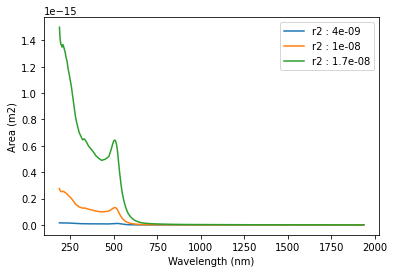

In [9]:

for i in range(n):
    r['r2'] = r2s[i]
    area_sca, area_abs = getArea(r, eps, lambd)
#     plt.plot(lambd*1e9, area_sca, label="r2 : {}".format(r['r2']))
#     plt.plot(lambd*1e9, area_abs, label="r2 : {}".format(r['r2']))
    plt.plot(lambd*1e9, area_sca+area_abs, label="r2 : {}".format(r['r2']))
    
plt.xlabel("Wavelength (nm)")
plt.ylabel("Area (m2)")
plt.legend()
plt.show()

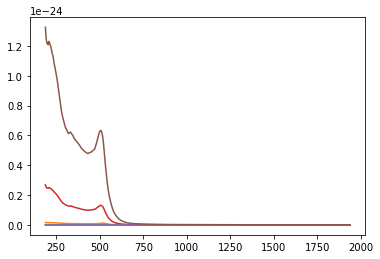

In [10]:
# Manual Check

n_data = len(eps['e2'])
n = len(r2s)

for idx in range(3):
    lambd_all, area_all = [], []
    for i in range(n_data):
        r_ = {
            'r1': 2*1e-9,
            'r2': r2s[idx],
        }
        eps_ = {
            'e1': 1.5,
            'e2': content['er'].values[i]+1j*content['ei'].values[i],
            'e3': 1,
        }
        lambd_ = content['wl'].values[i]
        area_ = getArea(r_, eps_, lambd_)
        lambd_all.append(lambd_)
        area_all.append(area_)
#         print("{}".format(area_), end='\r')
#         time.sleep(0.1)
    plt.plot(lambd_all, area_all, label="r2 : {}".format(r2s[idx]))
plt.show()